In [1]:
import pandas as pd
import sys
import numpy as np
import os
from PIL import Image
import glob
import ast

In [3]:
points_annotations = pd.read_csv('./data/cell_detection.tsv', sep ='\t')
points_annotations.head()

,cell_cid,center_x,center_y,region_rid,region_width,region_height,slide_sid,slide_name
0,4110112022214449,70,88,1210112022214409,1000,1000,1022220222152182,nlbx3-3.svs
1,3710112022214450,188,80,1210112022214409,1000,1000,1022220222152182,nlbx3-3.svs
2,5510112022214453,455,79,1210112022214409,1000,1000,1022220222152182,nlbx3-3.svs
3,7910112022214454,464,124,1210112022214409,1000,1000,1022220222152182,nlbx3-3.svs
4,1710112022214455,510,145,1210112022214409,1000,1000,1022220222152182,nlbx3-3.svs


In [20]:


res = 

In [23]:
x1,x2,y1,y2 = res[0]
y2

363

In [58]:
for string in glob.glob('./data/pre_selected_patches/*'):
    print(string)

./data/pre_selected_patches/1102620210134511
./data/pre_selected_patches/20220817173447_random_regions_CMML_sorted_seed10
./data/pre_selected_patches/1082320222029011
./data/pre_selected_patches/20220816162650_random_regions_seeed10_sorted
./data/pre_selected_patches/1082320221652150
./data/pre_selected_patches/1082320221656223


In [108]:
for string in glob.glob('./data/pre_selected_patches/*'):
    string = string.split('/')[-1]
    img_dirs = glob.glob('./data/pre_selected_patches/1102620210134511/'+string+'/*.p*')
    if len(img_dirs) == 0:
        img_dirs = glob.glob('./data/pre_selected_patches/'+string+'/*.j*')
    csv = pd.read_csv('./data/pre_selected_patches/'+string+'/boxes.csv', index_col=0)
    csv.head()

    for ID in csv['image_ID'].tolist():
        csv_sub = csv[csv['image_ID'] == ID]
        boxes = csv_sub['boxes'].values[0]
        boxes_list = ast.literal_eval(boxes)

        with open('./data/custom/labels/'+string+'_'+ID.split('.')[0]+'.txt','w') as F:
            for _box in boxes_list:
                x1,x2,y1,y2 = _box
                width = x2-x1
                height = y2-y1
                center_x = int((x1+x2)/2)
                center_y = int((y1+y2)/2)

                x, y  = center_x/512,center_y/512
                w,h = width/512, height/512

                F.write('0')
                F.write('\t')
                F.write(str(x))
                F.write('\t')
                F.write(str(y))
                F.write('\t')
                F.write(str(w))
                F.write('\t')
                F.write(str(h))
                F.write('\n')
            F.close()
        os.system('cp ./data/pre_selected_patches/'+string+'/'+ID+\
                  ' ./data/custom/images/'+string+'_'+ID)
            
                     

In [109]:
len(glob.glob('./data/custom/images/*'))

3050

In [110]:
len(glob.glob('./data/custom/labels/*'))

3050

In [111]:
from random import sample

valid_images = sample(glob.glob('./data/custom/images/*'), 600)
train_images = [x for x in glob.glob('./data/custom/images/*') if x not in valid_images ]

In [112]:
len(valid_images)

600

In [113]:
with open('./data/custom/train.txt','w') as F:
    for _img_dir in train_images:
        F.write(_img_dir +'\n')

with open('./data/custom/valid.txt','w') as F:
    for _img_dir in valid_images:
        F.write(_img_dir +'\n')

In [14]:
refined_df = points_annotations[['center_x', 'center_y', 'region_rid', 'region_width',
       'region_height']].iloc[:0]


,center_x,center_y,region_rid,region_width,region_height


In [23]:
I

(2404, 8)

,center_x,center_y,region_rid,region_width,region_height,case


In [22]:
refined_df['center_x']


NameError: name 'df' is not defined

In [25]:
list(range(3,6))

[3, 4, 5]

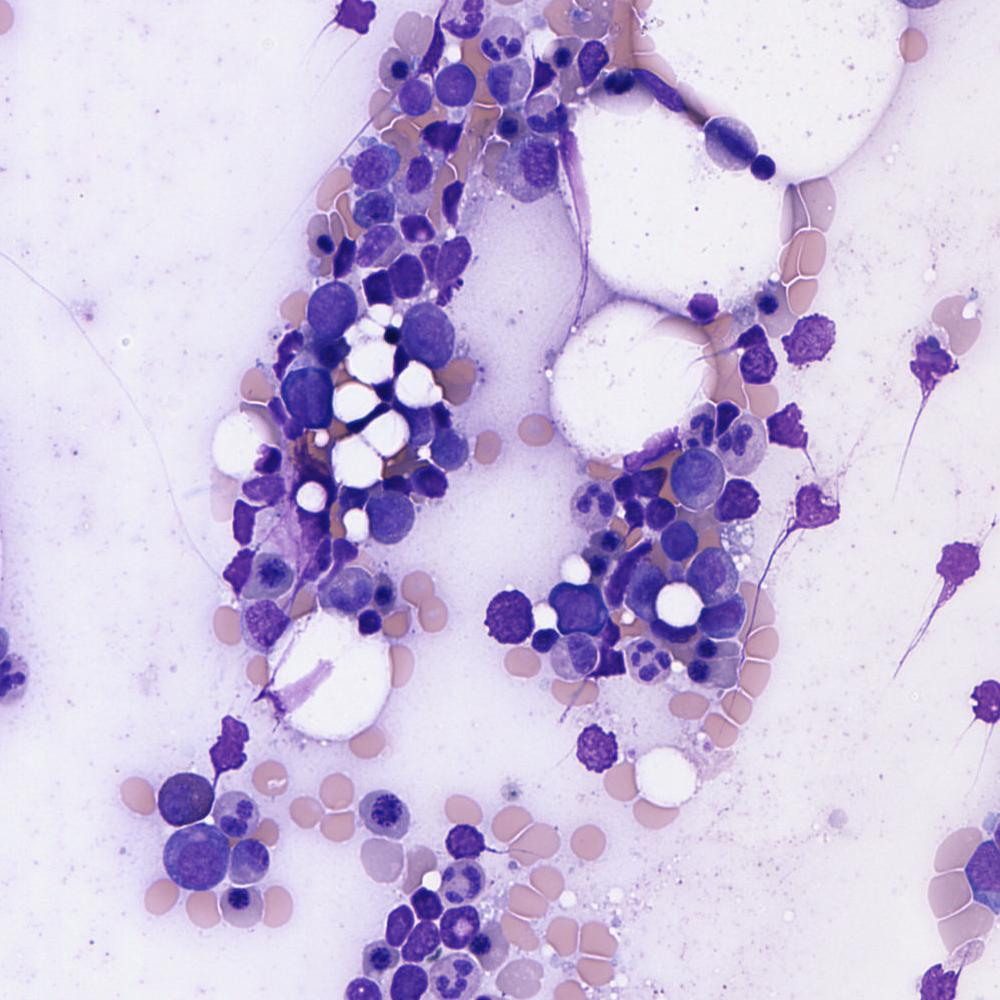

In [67]:
refined_df = points_annotations[['center_x', 'center_y', 'region_rid', 'region_width',
       'region_height']].iloc[:0]
for region_id in list(set(points_annotations['region_rid'])):
    patch = points_annotations[points_annotations['region_rid'].isin([region_id,])]
    image = Image.open('./data/custom/images_backup/'+str(region_id)+'.jpg')
    img_np = np.array(image)
    canvas = np.ones((1024,1024,3))*255
    canvas[:img_np.shape[0],:img_np.shape[1],:] = img_np
    canvas = canvas.astype(np.uint8)
    patch_image = canvas.copy()
    for i in range(3):
        for j in range(3):
            _id = i*3 + j
            
            region_sub_id = str(region_id)+'_'+str(_id)
            height = [i*256,i*256+512]
            width  = [j*256,j*256+512]
            patch_image_sub = patch_image[i*256:i*256+512,j*256:j*256+512,:]
            patch_image_sub = Image.fromarray(patch_image_sub)
            patch_image_sub.save('./data/custom/images/'+region_sub_id+'.png')
            patch_sub = patch.copy()
            patch_sub = patch_sub[(patch_sub['center_x']>=width[0]) & (patch_sub['center_x']<width[1])]
            patch_sub = patch_sub[(patch_sub['center_y']>=height[0]) & (patch_sub['center_y']<height[1])]
            patch_sub.index  = list(range(patch_sub.shape[0]))
            for k in range(patch_sub.shape[0]):
                x = patch_sub.iloc[k]['center_x']
                y = patch_sub.iloc[k]['center_y']
                x -= width[0]
                y -= height[0]
                # set it to be 64 for now
                if (x - 24>=0) and (x + 24<512):
                    add_row = {'center_x': x, 'center_y': y, 
                               'region_rid': region_sub_id,
                              'region_width':512,'region_height':512,}
                    refined_df = refined_df.append(add_row, ignore_index=True)
        

In [50]:
import matplotlib.pyplot as plt
  
# to draw a point on co-ordinate (200,300)



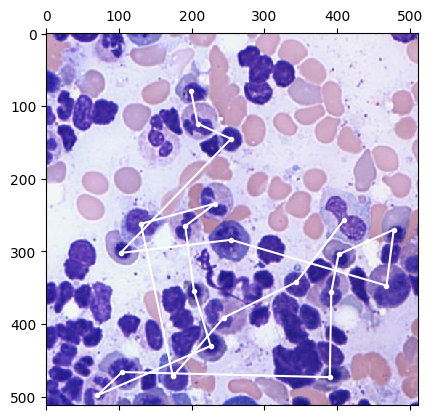

In [68]:
subset = refined_df[refined_df['region_rid'] == refined_df['region_rid'][23]]
subset
img = Image.open('./data/custom/images/'+str(refined_df['region_rid'][23])+'.png')
img = np.array(img)
plt.matshow(img)
plt.plot( subset['center_x'], subset['center_y'],marker='.', color="white")

#### Convert the dataset to the yolo format

#### file.txt

In [61]:
with open('./data/custom/train.txt', 'w') as F:
    for _region_id in list(set(refined_df['region_rid'])):
        F.write('data/custom/images/'+_region_id+'.png'+'\n')

with open('./data/custom/valid.txt', 'w') as F:
    for _region_id in list(set(refined_df['region_rid'])):
        F.write('data/custom/images/'+_region_id+'.png'+'\n')

#### label.txt

In [100]:
import glob
image_dirs = glob.glob('./data/custom/images/*')

In [107]:
cp ./data/custom_version0/labels/*.txt ./data/custom/labels/

In [73]:
subset.iloc[k]

center_x                         80
center_y                        276
region_rid       5010112022212449_0
region_width                    512
region_height                   512
Name: 0, dtype: object

In [79]:
for _dir in image_dirs:
    ID = _dir.split('.png')[-2].split('/')[-1]
    
    with open('./data/custom/labels/'+ID+'.txt','w') as F:
        subset = refined_df[refined_df['region_rid']==ID]
        subset.index = list(range(subset.shape[0]))
        if subset.shape[0] ==0:
            continue
        else:
            for k in range(subset.shape[0]):
                x, y  = subset.iloc[k]['center_x']/512,subset.iloc[k]['center_y']/512
                w,h = 0.09375, 0.09375
                F.write('0')
                F.write('\t')
                F.write(str(x))
                F.write('\t')
                F.write(str(y))
                F.write('\t')
                F.write(str(w))
                F.write('\t')
                F.write(str(h))
                F.write('\n')